In [1]:
import numpy as np
import pylab as pl
import ot

In [2]:
def comp_area(a,b,c,p):
    
    abc = np.asmatrix([np.concatenate((a,[1])),np.concatenate((b,[1])),np.concatenate((c,[1]))])
    abp = np.asmatrix([np.concatenate((a,[1])),np.concatenate((b,[1])),np.concatenate((p,[1]))])
    bcp = np.asmatrix([np.concatenate((b,[1])),np.concatenate((c,[1])),np.concatenate((p,[1]))])
    
    area1 = abs(np.linalg.det(abc))
    area2 = abs(np.linalg.det(abp))
    area3 = abs(np.linalg.det(bcp))
    
    if area2 == 0 or area3 == 0:
        weight = 0
    else:
        weight = 2*(area1 /(area2 * area3))
    
    return weight

In [3]:
A = np.array([0,0])
B = np.array([1,0])
C = np.array([1,1])
D = np.array([0,1])


nb_images = 5 ## Choose the number between images to interpolate
grid_x = grid_y = np.linspace(start = 0, stop = 1, num = nb_images)

In [4]:
f1 = 1 - pl.imread('/Users/Mehdi/Downloads/Heart.png')[:, :, 2]
f2 = 1 - pl.imread('/Users/Mehdi/Downloads/pear.png')[:, :, 2]
f3 = 1 - pl.imread('/Users/Mehdi/Downloads/Duck.png')[:, :, 2]
f4 = 1 - pl.imread('/Users/Mehdi/Downloads/Alien.png')[:, :, 2]

In [5]:
A1 = []
f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)

A1.append(f1)
A1.append(f2)
A1.append(f3)
A1.append(f4)

A1 = np.array(A1)

reg = 0.004
cm = 'Greys' ## Change the color for the output image here

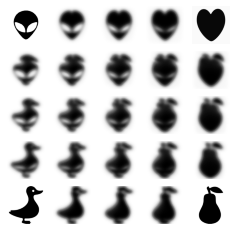

In [6]:
pl.figure(figsize=(4, 4)) ## Change the size of the output image

for i in range(nb_images):
    for j in range(nb_images):
        
        pl.subplot(nb_images, nb_images, i * nb_images + j + 1)
        
        if j == 0 or j == nb_images - 1:
            P = np.array([grid_x[i],grid_y[j]])
        elif i == 0 or i == nb_images -1:
            P = np.array([1 - grid_x[i],1 - grid_y[j]])
        else:
            P = np.array([grid_x[i],1- grid_y[j]])

        
        w1 = comp_area(D,A,B,P)
        w2 = comp_area(A,B,C,P)
        w3 = comp_area(B,C,D,P)
        w4 = comp_area(C,D,A,P)

        W1 = w1 / (w1+w2+w3+w4)
        W2 = w2 / (w1+w2+w3+w4)
        W3 = w3 / (w1+w2+w3+w4)
        W4 = w4 / (w1+w2+w3+w4)

        weights = np.array([W1,W2,W3,W4])

        
        if i == 0 and j == 0:
            pl.imshow(f4, cmap=cm)
            pl.axis('off')
        elif i == 0 and j == (nb_images - 1):
            pl.imshow(f1, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == 0:
            pl.imshow(f3, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            pl.imshow(f2, cmap=cm)
            pl.axis('off')
        else:
            pl.imshow(ot.bregman.convolutional_barycenter2d(A1, reg, weights), cmap=cm)
            pl.axis('off')
            

